In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from clustergram import Clustergram
import pickle

In [3]:
df = pd.read_parquet('../../nairobi/contextual_10.parquet')

In [4]:
df

stcOri_meanIQ3  stcOri_rangeIQ3  stcOri_theilID3  stcOri_simpson  \
uID                                                                        
0            26.722733        27.353630         0.123782        0.193623   
1            20.580721        25.764247         0.168051        0.177354   
2            17.683702        22.006283         0.174566        0.185323   
3            23.683932        25.484118         0.133979        0.170560   
4            22.135574        21.727245         0.125153        0.167390   
...                ...              ...              ...             ...   
507527       20.387543        19.918957         0.099205        0.177778   
507528       14.833286        20.575838         0.193528        0.202170   
507529       32.555790        21.889439         0.072924        0.238168   
507530       30.159309        18.670019         0.064655        0.205677   
507531       11.428519        30.422037         0.618903        0.418367   

        sdcLAL_meanIQ3  sdcLAL_rangeIQ3  sdcLAL_theilID3  sdcLAL_simpson  \
uID                                                                        
0            57.728361        41.134228         0.071930        0.266098   
1            39.547150        23.120519         0.041175        0.478405   
2            37.583862        18.673246         0.033331        0.547468   
3            63.609651        40.358300         0.050194        0.266533   
4            63.593589        81.249308         0.138113        0.240079   
...                ...              ...              ...             ...   
507527      157.050907        86.218154         0.045848        0.148889   
507528       64.005193        43.784899         0.057571        0.246025   
507529       49.052544        48.459680         0.099836        0.324191   
507530       58.636492        57.792744         0.111814        0.258439   
507531      202.904515        49.055185         0.011157        0.255102   

        sdcAre_meanIQ3  sdcAre_rangeIQ3  ...  mtbNDi_theilID3  mtbNDi_simpson  \
uID                                      ...                                    
0          1267.939326      1718.622733  ...         0.111466        0.313346   
1           588.287670       670.601819  ...         0.074363        0.543408   
2           531.956293       555.202833  ...         0.059023        0.574022   
3          1485.252524      1963.035356  ...         0.087914        0.266992   
4          1471.313502      3320.408802  ...         0.216902        0.293517   
...                ...              ...  ...              ...             ...   
507527     9185.998211     14710.015104  ...         0.095933        0.155556   
507528     1480.937408      2117.222388  ...         0.087076        0.280618   
507529      916.126205      1842.433313  ...         0.127814        0.368624   
507530     1275.147313      2412.461369  ...         0.152553        0.347123   
507531    18458.876509     17670.155248  ...         0.246666        0.153061   

        ltbIBD_meanIQ3  ltbIBD_rangeIQ3  ltbIBD_theilID3  ltbIBD_simpson  \
uID                                                                        
0            29.151130        14.040700         0.025781        0.313045   
1            16.147352         3.439785         0.006132        0.822784   
2            16.068935         3.933508         0.009576        0.758179   
3            36.035678        10.377161         0.008657        0.437035   
4            30.861390        29.607476         0.095891        0.236923   
...                ...              ...              ...             ...   
507527       59.670275        34.016299         0.023705        0.322222   
507528       36.347556        12.443669         0.013469        0.330529   
507529       22.889711        19.032021         0.067195        0.323230   
507530       26.293550        12.117409         0.023123        0.362045   
507531       81.978199         6.496570         0.005288        

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [22]:
cg = Clustergram(range(1, 25), backend='sklearn', n_init=10)
cg.fit(data)

K=1 fitted in 2.1314942836761475 seconds.
K=2 fitted in 6.2873852252960205 seconds.
K=3 fitted in 10.211591243743896 seconds.
K=4 fitted in 11.8870689868927 seconds.
K=5 fitted in 17.472689390182495 seconds.
K=6 fitted in 19.765103578567505 seconds.
K=7 fitted in 26.53349542617798 seconds.
K=8 fitted in 27.254316806793213 seconds.
K=9 fitted in 38.30819225311279 seconds.
K=10 fitted in 48.48526954650879 seconds.
K=11 fitted in 45.52030420303345 seconds.
K=12 fitted in 48.07735633850098 seconds.
K=13 fitted in 41.04560089111328 seconds.
K=14 fitted in 70.36872887611389 seconds.
K=15 fitted in 63.29966473579407 seconds.
K=16 fitted in 48.31029725074768 seconds.
K=17 fitted in 53.33627796173096 seconds.
K=18 fitted in 64.54991126060486 seconds.
K=19 fitted in 71.45963144302368 seconds.
K=20 fitted in 66.72178816795349 seconds.
K=21 fitted in 94.70968317985535 seconds.
K=22 fitted in 76.865225315094 seconds.
K=23 fitted in 81.10545086860657 seconds.
K=24 fitted in 89.275151014328 seconds.


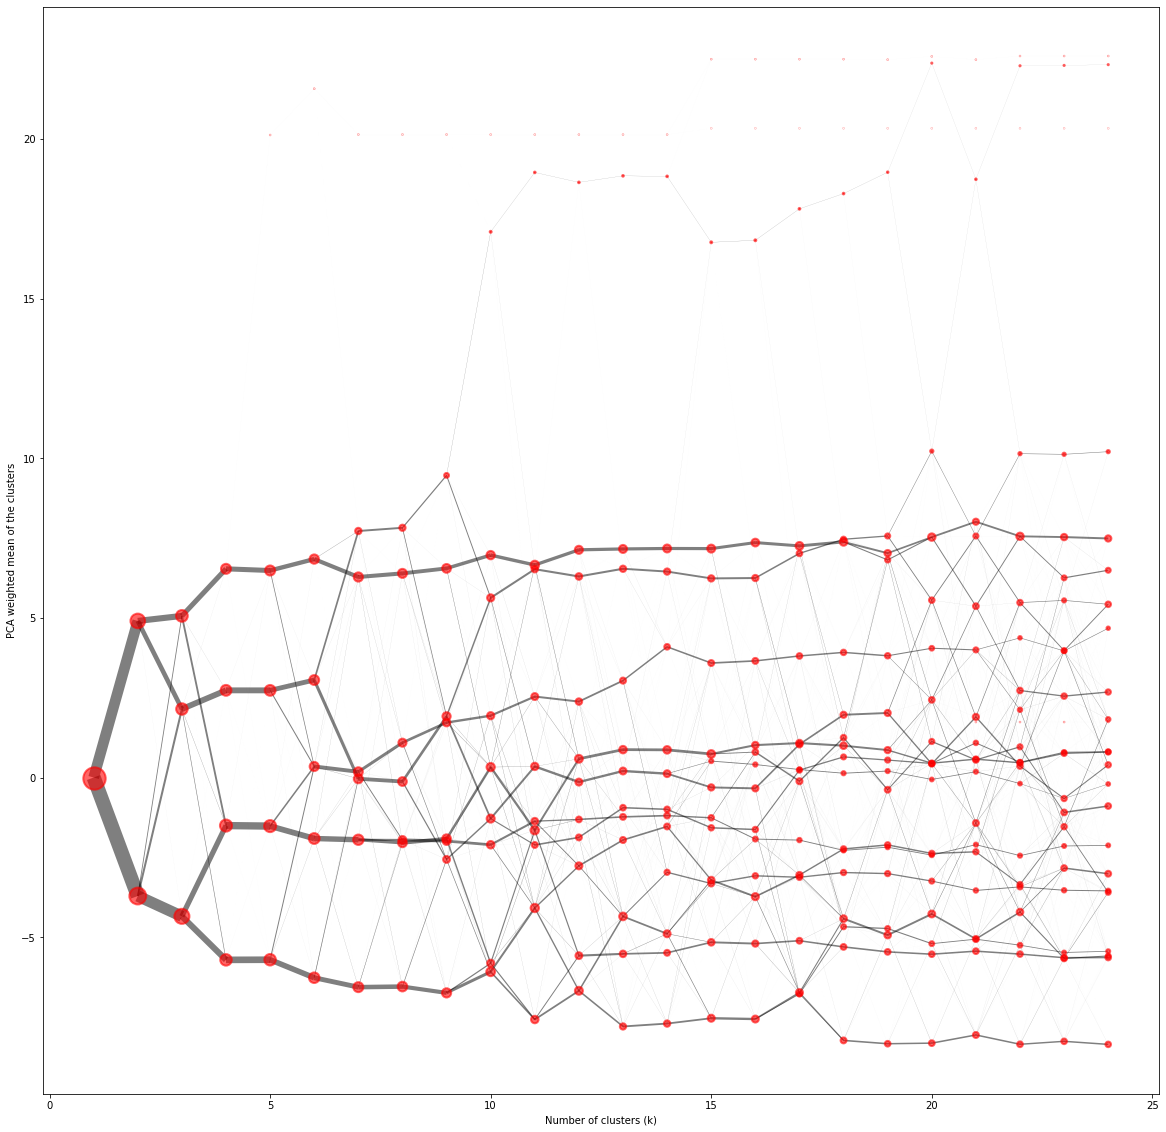

In [23]:
ax = cg.plot(figsize=(20, 20), linewidth=0.5, cluster_style={"edgecolor": "r", "alpha":.6}, size=1,
       line_style={"alpha":.5})
# ax.set_ylim(-10, 40)

In [39]:
with open('../../nairobi/clustergram.pickle','wb') as f:
    pickle.dump(cg, f)

In [46]:
for i in range(1, 25):
    
    gdf[i] = pd.Series(cg.labels[i].values, index=df.index)

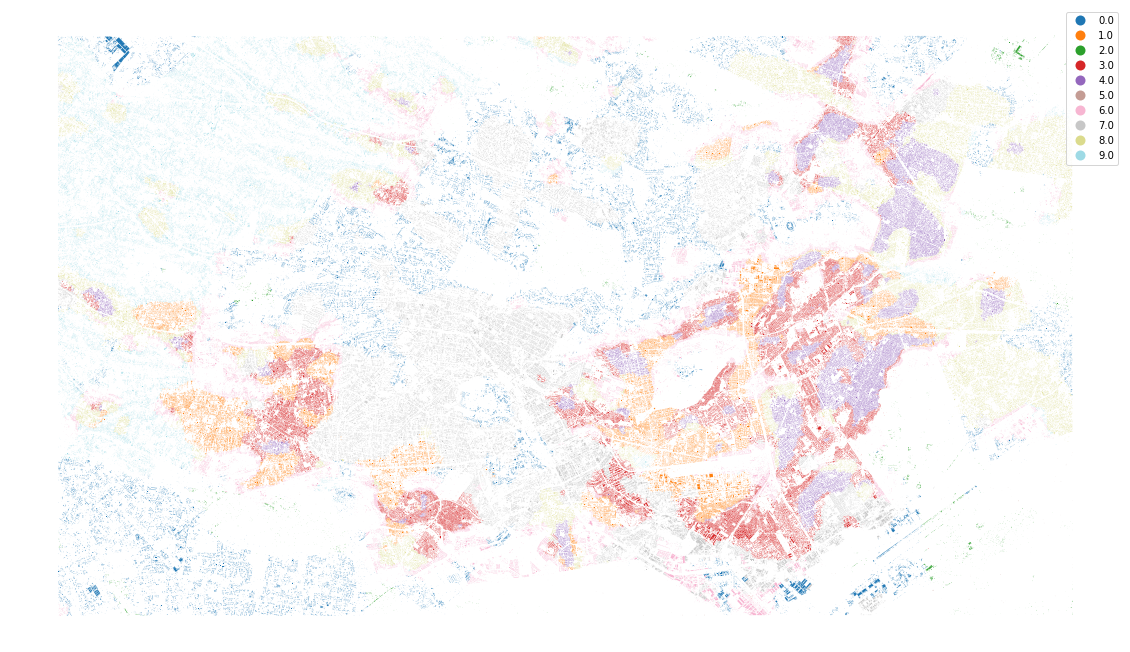

In [36]:
ax = gdf.plot(10, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

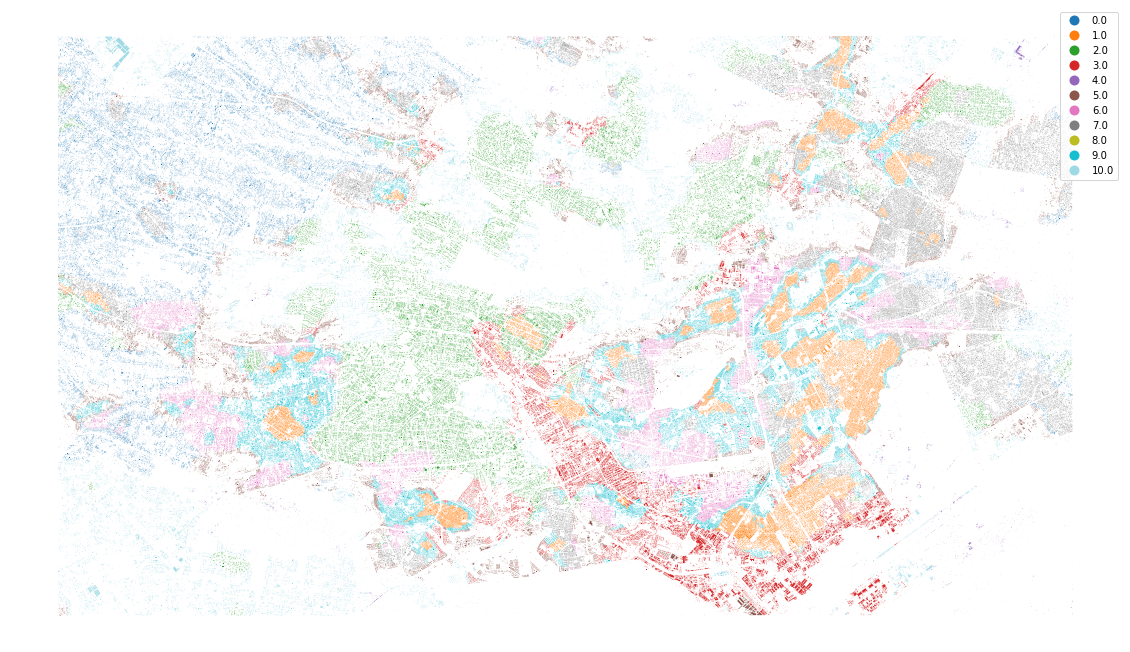

In [47]:
ax = gdf.plot(11, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

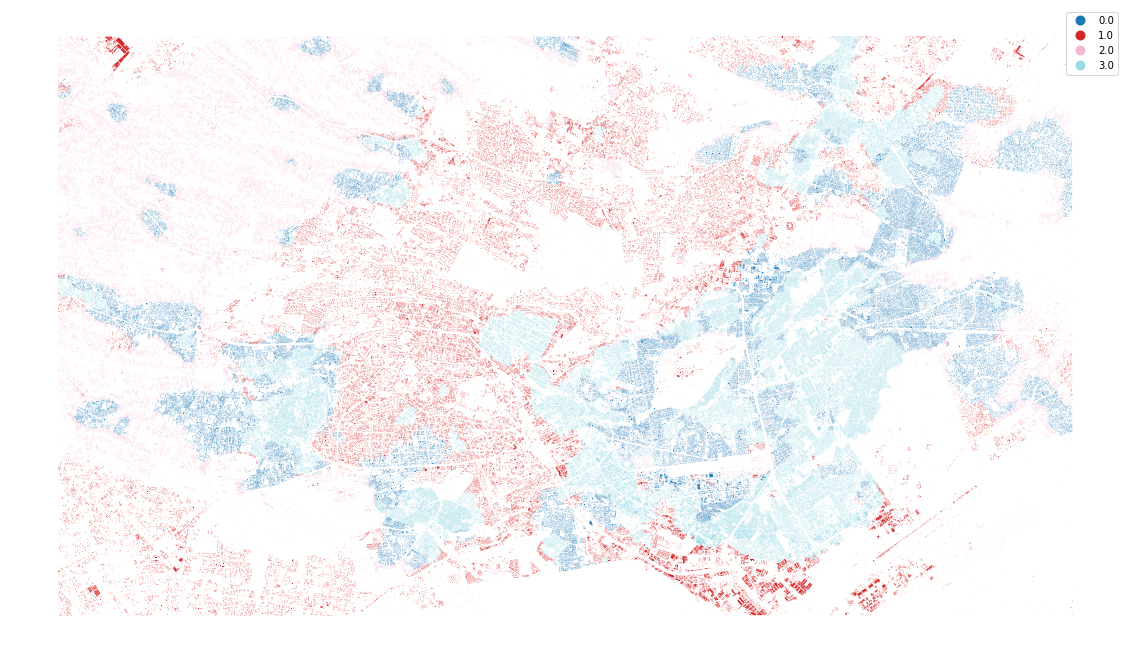

In [48]:
ax = gdf.plot(4, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

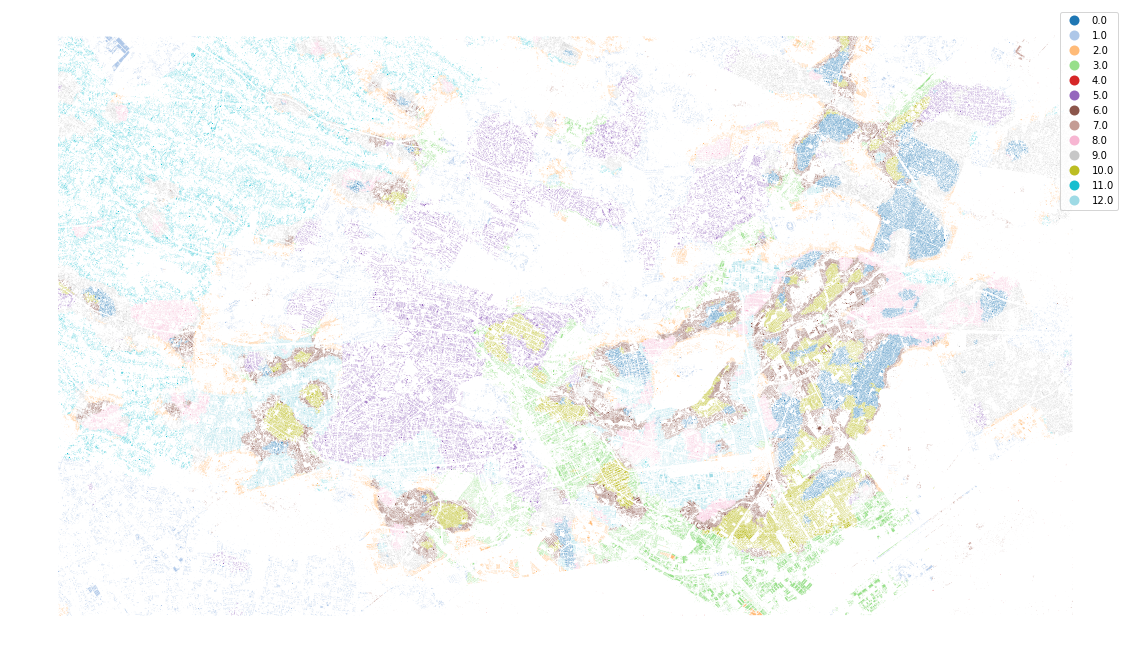

In [49]:
ax = gdf.plot(13, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

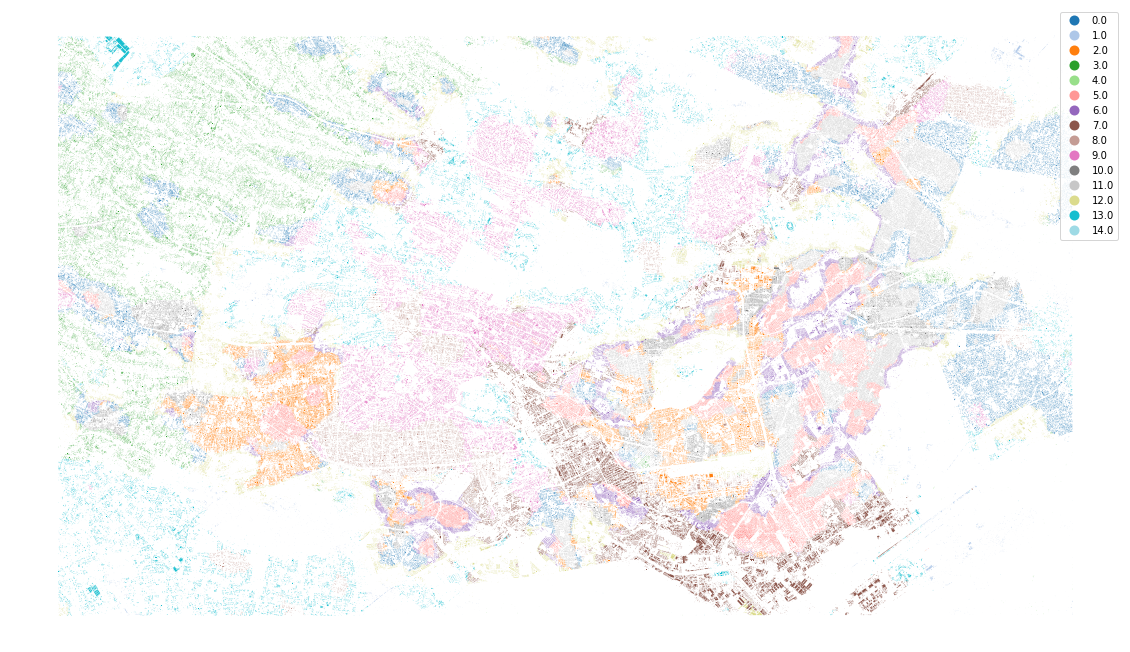

In [50]:
ax = gdf.plot(15, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

In [44]:
silhouette = cg.silhouette_score(sample_size=10000)

<AxesSubplot:>

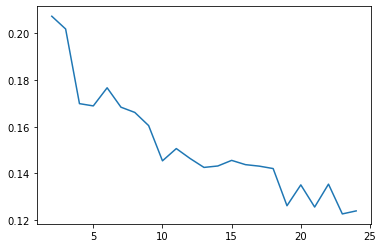

In [45]:
silhouette.plot()

<AxesSubplot:>

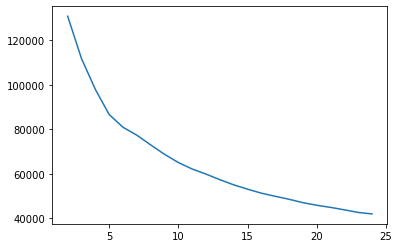

In [33]:
calinski = cg.calinski_harabasz_score()
calinski.plot()

<AxesSubplot:>

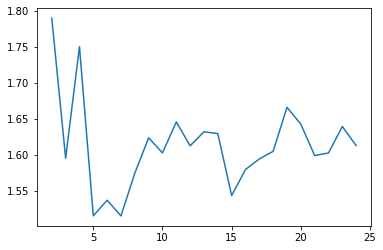

In [34]:
db = cg.davies_bouldin_score()
db.plot()

In [7]:
%time km_form = KMeans(n_clusters=14, n_init=10, verbose=1).fit(data)

Initialization complete
Iteration 0, inertia 27927795.51524542
Iteration 1, inertia 20638723.19498048
Iteration 2, inertia 20131396.096725706
Iteration 3, inertia 19910536.856082655
Iteration 4, inertia 19765756.812076904
Iteration 5, inertia 19671846.648378354
Iteration 6, inertia 19620437.83297592
Iteration 7, inertia 19583137.669580877
Iteration 8, inertia 19542280.943687327
Iteration 9, inertia 19491981.788846403
Iteration 10, inertia 19445080.17411716
Iteration 11, inertia 19406763.98290454
Iteration 12, inertia 19377317.992822196
Iteration 13, inertia 19352848.397745486
Iteration 14, inertia 19331604.39434286
Iteration 15, inertia 19310214.050340235
Iteration 16, inertia 19286839.179275632
Iteration 17, inertia 19267608.086519383
Iteration 18, inertia 19251890.130198773
Iteration 19, inertia 19238056.741096407
Iteration 20, inertia 19225313.43258465
Iteration 21, inertia 19213690.313866243
Iteration 22, inertia 19204119.926342953
Iteration 23, inertia 19195780.787893906
Iteration

In [9]:
gdf = gpd.read_parquet("../../nairobi/buildings.pq")

In [11]:
labels = pd.Series(km_form.labels_, index=df.index)

In [13]:
gdf = gdf.set_index('uID')

In [14]:
gdf['clusters'] = labels

In [18]:
boundaries = gpd.read_file("https://www.dropbox.com/s/agza7cnarzw6o0j/nairobi%20county%20informal%20settlement%20boundary%202016.gpkg?dl=1")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [20]:
boundaries = boundaries.to_crs(gdf.crs)

<AxesSubplot:>

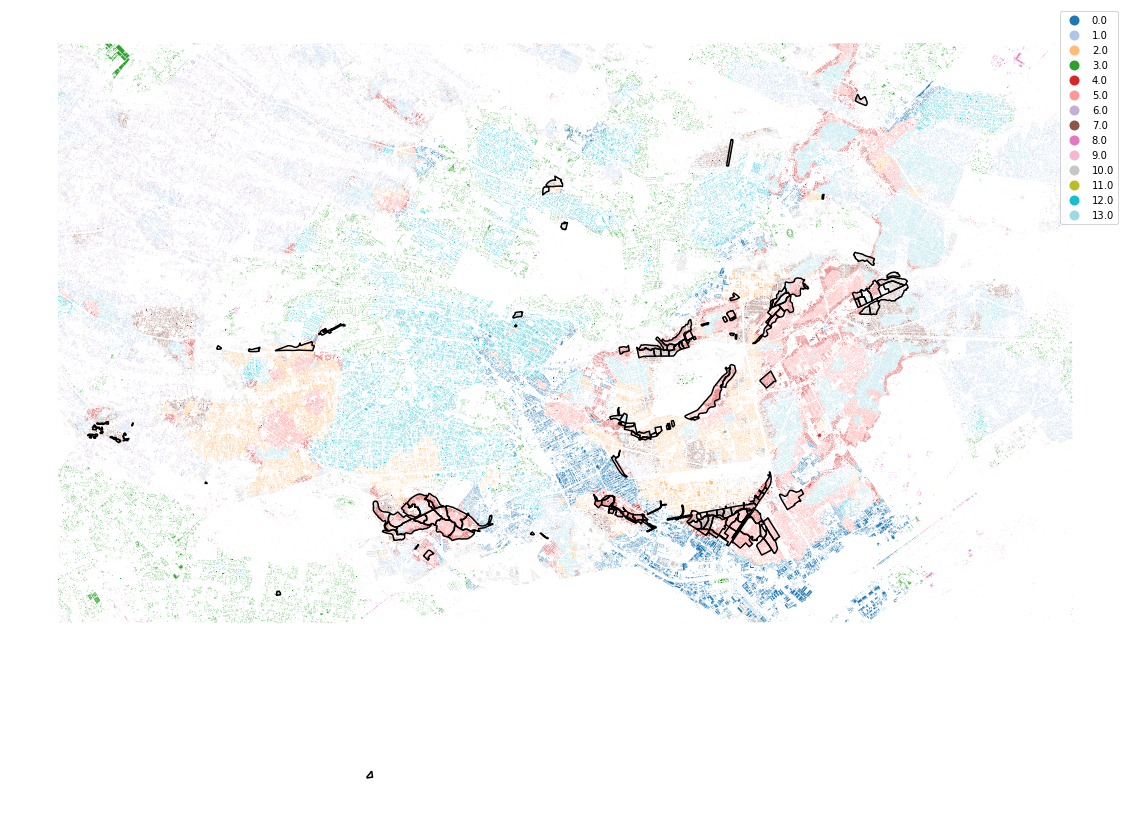

In [21]:
ax = gdf.plot('clusters', categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()
boundaries.boundary.plot(ax=ax, edgecolor='k')